Data aggregation refers to summarizing data with statistics such as sum, count, average, maximum, minimum etc. to provide a high level view of the data. Often there are mutually exclusive groups in the data that are of interest. In such cases, we may be interested in finding these statisitcs separately for each group. The Pandas DataFrame method `groupby()` is used to split the data into groups, and then the desired function(s) are applied on each of these groups for groupwise data aggregation. However, the `groupby()` method is not limited for groupwise data aggregation, but can also be used for several other kinds of groupwise oprations. 

**Groupby mechanics:** *(Source: https://pandas.pydata.org/docs/user_guide/groupby.html)*

Group by: split-apply-combine
By *'group by'* we are referring to a process involving one or more of the following steps:

1. Splitting the data into groups based on some criteria.

2. Applying a function to each group independently.

3. Combining the results in a DataFrame.

Out of these, the split step is the most straightforward. In fact, in many situations we may wish to split the data set into groups and do something with those groups. In the apply step, we may wish to do one of the following:

**1. Aggregation:** compute a summary statistic (or statistics) for each group. Some examples:

  - Compute group sums or means. 
  - Compute group sizes / counts.

**2. Transformation:** perform some group-specific computations and return a like-indexed object. Some examples:

   - Standardize data *(zscore)* within a group. 
   - Filling *NAs* within groups with a value derived from each group.

**3. Filtration:** discard some groups, according to a group-wise computation that evaluates True or False. Some examples:

   - Discard data that belongs to groups with only a few members. 
   - Filter out data based on the group *sum* or *mean*.

Some combination of the above: *GroupBy* will examine the results of the *apply* step and try to return a sensibly combined result if it doesn’t fit into either of the above two categories.

We'll use Pandas to group the data and perform *GroupBy* operations.

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## The GroupBy object

### Creating a GroupBy object: [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

This Pandas DataFrame method `groupby()` is used to create a `GroupBy` object.

A string passed to `groupby()` may refer to either a column or an index level. If a string matches both a column name and an index level name, a ValueError will be raised.

**Example**: Consider the life expectancy dataset, *gdp_lifeExpectancy.csv*. Suppose we want to group by the observations by `continent`.

# Randomly sample 5 observations of each genre from `spotify_data`

In [159]:
pd.crosstab(spotify_data.genres,spotify_data.energy_lvl,margins=True)

energy_lvl,Low energy,High energy,All
genres,,,
country,725,511,1236
electronic,261,529,790
folk,2075,746,2821
hip hop,2235,5138,7373
hoerspiel,9129,3385,12514
jazz,11392,1971,13363
latin,908,1217,2125
metal,129,1530,1659
miscellaneous,22088,13760,35848


In [155]:
pd.pivot_table(data = spotify_data,values='track_popularity',
               index = 'genres',columns='energy_lvl',aggfunc='mean',margins=True)

energy_lvl,Low energy,High energy,All
genres,,,
country,34.982069,49.859100,41.132686
electronic,43.754789,43.005671,43.253165
folk,29.617831,29.991957,29.716767
hip hop,50.283669,48.012067,48.700665
hoerspiel,31.534779,30.514032,31.258670
jazz,19.421085,25.715373,20.349472
latin,34.308370,39.992605,37.563765
metal,38.612403,46.985621,46.334539
miscellaneous,34.157235,39.394186,36.167401


In [151]:
spotify_data[['track_popularity','energy_lvl','genres']]

,track_popularity,energy_lvl,genres
0,0,Low energy,rap
1,0,Low energy,rap
2,0,High energy,rap
3,0,High energy,rap
4,0,High energy,rap
...,...,...,...
243185,5,Low energy,jazz
243186,6,Low energy,jazz
243187,4,Low energy,jazz
243188,4,Low energy,jazz


In [147]:
spotify_data.groupby(['genres','energy_lvl']).apply(lambda x:x['track_popularity'].corr(x['danceability']))

genres         energy_lvl 
country        Low energy    -0.171830
               High energy   -0.154823
electronic     Low energy     0.378330
               High energy    0.072343
folk           Low energy     0.187482
               High energy    0.230419
hip hop        Low energy     0.113421
               High energy    0.027074
hoerspiel      Low energy    -0.053908
               High energy   -0.044211
jazz           Low energy     0.005733
               High energy    0.332356
latin          Low energy    -0.083971
               High energy    0.030276
metal          Low energy     0.127439
               High energy    0.256165
miscellaneous  Low energy     0.163185
               High energy    0.148818
pop            Low energy     0.208942
               High energy    0.156764
pop & rock     Low energy     0.063127
               High energy    0.060195
rap            Low energy    -0.008394
               High energy   -0.129873
rock           Low energy     0.02787

In [139]:
spotify_data.groupby('genres').apply(lambda x:x.sample(5))

artist_followers   genres        artist_name  \
genres                                                         
country 163186           4615328  country        Johnny Cash   
        212535           1515343  country       Alan Jackson   
        176195           4615328  country        Johnny Cash   
        21252             238140  country   Jennifer Nettles   
        92690              60143  country    Charlie Robison   
...                          ...      ...                ...   
rock    177302            830058     rock    The Moody Blues   
        201731             92396     rock          Guy Clark   
        165171            481877     rock      Jimmy Buffett   
        42821             385756     rock              Saxon   
        29395             629496     rock  Son Feci Bisiklet   

                artist_popularity  \
genres                              
country 163186                 79   
        212535                 76   
        176195                 79   
        21252                  53   
        92690                  52   
...                           ...   
rock    177302                 63   
        201731                 51   
        165171                 71   
        42821                  56   
        29395                  62   

                                                       track_name  \
genres                                                              
country 163186                                      Amazing Grace   
        212535                       Chattahoochee - Extended Mix   
        176195  Dark as the Dungeon - Live at Folsom State Pri...   
        21252                                           That Girl   
        92690                                       Loving County   
...                                                           ...   
rock    177302  Nights In White Satin - Single Version / Mono Mix   
        201731                     Desperados Waiting For A Train   
        165171                            A Pirate Looks At Forty   
        42821            Midnight Rider - 2009 Remastered Version   
        29395                                     Pazar Ve Ertesi   

                track_popularity  duration_ms  explicit  release_year  \
genres                                                                  
country 163186                35       146880         0          1975   
        212535                60       237267         0          1989   
        176195                51       187707         0          1968   
        21252                  5       240107         0          2017   
        92690                 42       388400         0          1998   
...                          ...          ...       ...           ...   
rock    177302                69       269107         0          1967   
        201731                27       269733         0          1998   
        165171                56       235360         0          1974   
        42821                  1       346773         0          2012   
        29395                 56       205283         0          2015   

                danceability  ...  loudness  mode  speechiness  acousticness  \
genres                        ...                                              
country 163186         0.373  ...   -14.088     1       0.0276      0.927000   
        212535         0.579  ...    -7.454     1       0.0449      0.121000   
        176195         0.499  ...   -17.128     1       0.1930      0.859000   
        21252          0.691  ...    -4.858     0       0.0908      0.551000   
        92690          0.533  ...   -11.708     1       0.0276      0.267000   
...                      ...  ...       ...   ...          ...           ...   
rock    177302         0.195  ...    -4.991     0       0.0300      0.465000   
        201731         0.593  ...    -9.468     0       0.0346      0.797000   
        165171         0.565  ...   -17.384     1    

In [144]:
spotify_data.groupby('genres').sample(5)

,artist_followers,genres,artist_name,artist_popularity,track_name,track_popularity,duration_ms,explicit,release_year,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,energy_lvl
198643,857926,country,Sara Evans,58,Suds in the Bucket,41,227267,0,2003,0.511,...,-3.163,1,0.0397,0.05200,0.000529,0.3040,0.8980,161.992,4,High energy
2411,1678738,country,Morgan Wallen,88,Warning,74,156747,0,2021,0.633,...,-5.037,1,0.0294,0.46000,0.000000,0.1080,0.2680,115.058,4,High energy
68597,2026135,country,Brad Paisley,71,Waitin' On a Woman,54,272587,0,2005,0.548,...,-7.093,1,0.0284,0.08480,0.000051,0.1130,0.3390,76.367,4,High energy
188950,4615328,country,Johnny Cash,79,"I Walk the Line (Alternate Version, Take 1) (2...",12,158169,0,1957,0.820,...,-14.536,0,0.0442,0.54300,0.000102,0.1020,0.7790,102.355,4,Low energy
188069,4615328,country,Johnny Cash,79,Train of Love,21,141919,0,1958,0.847,...,-10.018,0,0.0760,0.78500,0.000148,0.1090,0.7550,102.337,4,Low energy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202993,384228,rock,Phish,61,Loving Cup,39,367773,0,1997,0.188,...,-4.398,1,0.0747,0.17600,0.000061,0.9020,0.5210,163.556,4,High energy
87367,33483326,rock,Queen,89,No One But You (Only The Good Die Young),54,251333,0,1999,0.482,...,-8.348,0,0.0296,0.59100,0.000000,0.0927,0.0955,119.194,3,Low energy
130283,266633,rock,Grazhdanskaya Oborona,53,Всё идёт по плану,21,299256,1,1988,0.273,...,-12.653,0,0.0309,0.00772,0.922000,0.2560,0.5510,109.287,4,Low energy
53187,4766540,rock,Charlie Brown Jr.,76,Puro sangue,40,247947,0,2009,0.659,...,-4.532,1,0.0320,0.17800,0.000000,0.2970,0.8810,79.972,4,High energy


In [134]:
sample_Data = spotify_data.sample(65)

In [135]:
sample_Data.genres.value_counts()

pop & rock       17
pop              17
rock              9
miscellaneous     8
rap               4
hoerspiel         3
jazz              3
hip hop           2
electronic        1
folk              1
Name: genres, dtype: int64

In [126]:
gdp_missing_data.gdpPerCapita.isnull().sum()

10

In [130]:
gdp_imputed_data.groupby('continent')['gdpPerCapita']

RMSE= 25473.20645170116


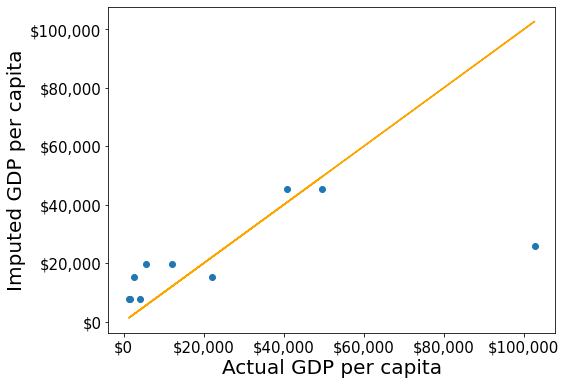

In [129]:
gdp_imputed_data = gdp_missing_data.copy()
gdp_imputed_data.gdpPerCapita = gdp_imputed_data.groupby('continent')['gdpPerCapita'].apply(lambda x:x.fillna(x.mean()))
plot_actual_vs_predicted()

In [124]:
gdp_missing_data
gdp_complete_data

,economicActivityFemale,country,region,totalfertilityrate,lifeMale,infantMortality,gdpPerCapita,economicActivityMale,illiteracyMale,illiteracyFemale,lifeFemale,geographic_location,contraception
0,7.2,Afghanistan,other,6.90,45.0,154,2474,87.5,52.800,85.000,46.0,Southern Asia,NaN
1,7.8,Algeria,other,3.81,67.5,44,11433,76.4,26.100,51.000,70.3,Northern Africa,NaN
2,41.3,Argentina,west,2.62,69.6,22,22141,76.2,3.800,3.800,76.8,South America,NaN
3,52.0,Armenia,west,1.70,67.2,25,13638,65.0,0.300,0.500,74.0,Western Asia,NaN
4,53.8,Australia,other,1.89,75.4,6,54891,74.0,1.000,1.000,81.2,Oceania,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,79.3,Vanuatu,other,4.36,65.5,38,2646,88.6,34.914,46.368,69.5,Oceania,0.0
151,41.2,Venezuela,west,2.98,70.0,21,5178,82.1,8.200,9.700,75.7,South America,0.0
152,74.1,Vietnam,other,2.97,64.9,37,11677,81.6,3.500,8.800,69.6,South-eastern Asia,0.0
153,1.9,Yemen,other,7.60,57.4,80,1924,80.6,32.406,69.552,58.4,Western Asia,0.0


In [122]:
spotify_data.groupby('genres').apply(lambda x:x.sort_values(by = 'track_popularity',ascending= False)[0:3])

artist_followers         genres          artist_name  \
genres                                                                       
country       4047             4755356        country           Luke Combs   
              2403             1678738        country        Morgan Wallen   
              16244            1678738        country        Morgan Wallen   
electronic    83058            7650304     electronic            Daft Punk   
              13068           28026432     electronic          Alan Walker   
              16141              13398     electronic              Leat'eq   
folk          38952             487791           folk      The Paper Kites   
              58912            2959378           folk             Bon Iver   
              44334             512429           folk          Xavier Rudd   
hip hop       2442              177401        hip hop          Masked Wolf   
              3757             1624015        hip hop        The Kid LAROI   
              19412           26747778        hip hop         XXXTENTACION   
hoerspiel     34901              50805      hoerspiel  Lina Larissa Strahl   
              121264            125018      hoerspiel        Bibi und Tina   
              26644              50805      hoerspiel  Lina Larissa Strahl   
jazz          155656           2844202           jazz   Earth, Wind & Fire   
              176078           2541086           jazz      Aretha Franklin   
              237696           1170068           jazz           Etta James   
latin         5214            25073031          latin               Maluma   
              2212            25073031          latin               Maluma   
              4953            25073031          latin               Maluma   
metal         84548           18611017          metal          Linkin Park   
              76463           18611017          metal          Linkin Park   
              76596            3025719          metal          Evanescence   
miscellaneous 5163              224299  miscellaneous                 Boza   
              5509             5076597  miscellaneous            Pop Smoke   
              5787               31001  miscellaneous                 HVME   
pop           2398             1444702            pop       Olivia Rodrigo   
              3133             1698014            pop           Kali Uchis   
              6702            31308207            pop           The Weeknd   
pop & rock    38542            5906677     pop & rock    The Neighbourhood   
              9513            30291109     pop & rock             Maroon 5   
              27846            5906677     pop & rock    The Neighbourhood   
rap           3975            15941533            rap              KAROL G   
              208              3657199            rap               Polo G   
              9663            32167665            rap          Post Malone   
rock          19973           33665795           rock      Imagine Dragons   
              1510            33665795           rock      Imagine Dragons   
              37287           11481777           rock       Arctic Monkeys   

                      artist_popularity                     track_name  \
genres                                                                   
country       4047                   85              Forever After All   
              2403                   88                  Wasted On You   
              16244                  88                Whiskey Glasses   
electronic    83058                  86                  One More Time   
              13068                  85                          Faded   
              16141                  65                          Tokyo   
folk          38952                  70            Bloom - Bonus Track   
              58912                  80                    Skinny Love   
              44334                  65                 Follow The Sun   
hip hop  

In [117]:
spotify_data.groupby(['genres','energy_lvl'])[['track_popularity',
                                            'danceability']].agg({'track_popularity':[('average','mean'),'std'],
                                                                 'danceability':[('ninety_pc', lambda x:x.quantile(0.9))]})

track_popularity            danceability
                                   average        std    ninety_pc
genres        energy_lvl                                          
country       Low energy         34.982069  19.877274       0.7536
              High energy        49.859100  18.196092       0.7290
electronic    Low energy         43.754789  13.294925       0.8610
              High energy        43.005671  17.290356       0.8194
folk          Low energy         29.617831  15.360910       0.7060
              High energy        29.991957  14.556622       0.7385
hip hop       Low energy         50.283669  12.423124       0.8860
              High energy        48.012067  12.936656       0.8640
hoerspiel     Low energy         31.534779   5.953968       0.7520
              High energy        30.514032   7.609088       0.7270
jazz          Low energy         19.421085  14.599499       0.6909
              High energy        25.715373  16.662754       0.7690
latin         Low energy         34.308370  15.126721       0.7570
              High energy        39.992605  13.504109       0.8100
metal         Low energy         38.612403  16.000151       0.5890
              High energy        46.985621  13.993685       0.5570
miscellaneous Low energy         34.157235  16.516910       0.7810
              High energy        39.394186  15.241620       0.8050
pop           Low energy         34.722631  18.340408       0.7530
              High energy        40.597155  16.784034       0.7950
pop & rock    Low energy         32.987221  15.594202       0.7240
              High energy        37.413357  15.280915       0.7230
rap           Low energy         57.177966  16.491203       0.8732
              High energy        48.225166  22.182320       0.8810
rock          Low energy         34.654871  14.387263       0.7400
              High energy        38.256199  14.133726       0.7020

In [115]:
spotify_data.groupby(['genres','energy_lvl'])[['track_popularity',
                                            'danceability']].agg([('average','mean'),'std',
                                                                  ('ninety_pc', lambda x:x.quantile(0.9))])

track_popularity                      danceability  \
                                   average        std ninety_pc      average   
genres        energy_lvl                                                       
country       Low energy         34.982069  19.877274      64.0     0.602382   
              High energy        49.859100  18.196092      69.0     0.597569   
electronic    Low energy         43.754789  13.294925      59.0     0.563125   
              High energy        43.005671  17.290356      61.2     0.634216   
folk          Low energy         29.617831  15.360910      51.0     0.510957   
              High energy        29.991957  14.556622      49.0     0.564669   
hip hop       Low energy         50.283669  12.423124      66.0     0.731064   
              High energy        48.012067  12.936656      63.0     0.714225   
hoerspiel     Low energy         31.534779   5.953968      37.0     0.673494   
              High energy        30.514032   7.609088      38.0     0.628369   
jazz          Low energy         19.421085  14.599499      41.0     0.503981   
              High energy        25.715373  16.662754      50.0     0.599330   
latin         Low energy         34.308370  15.126721      53.0     0.559290   
              High energy        39.992605  13.504109      58.0     0.644309   
metal         Low energy         38.612403  16.000151      60.4     0.409464   
              High energy        46.985621  13.993685      64.0     0.420022   
miscellaneous Low energy         34.157235  16.516910      56.0     0.543357   
              High energy        39.394186  15.241620      59.0     0.629966   
pop           Low energy         34.722631  18.340408      59.0     0.544546   
              High energy        40.597155  16.784034      61.0     0.628555   
pop & rock    Low energy         32.987221  15.594202      54.0     0.533666   
              High energy        37.413357  15.280915      57.0     0.554165   
rap           Low energy         57.177966  16.491203      75.0     0.712144   
              High energy        48.225166  22.182320      74.0     0.729174   
rock          Low energy         34.654871  14.387263      54.0     0.533698   
              High energy        38.256199  14.133726      57.0     0.510587   

                                               
                                std ninety_pc  
genres        energy_lvl                       
country       Low energy   0.128027    0.7536  
              High energy  0.105243    0.7290  
electronic    Low energy   0.242978    0.8610  
              High energy  0.152565    0.8194  
folk          Low energy   0.152062    0.7060  
              High energy  0.136981    0.7385  
hip hop       Low energy   0.134749    0.8860  
              High energy  0.125525    0.8640  
hoerspiel     Low energy   0.072998    0.7520  
              High energy  0.083672    0.7270  
jazz          Low energy   0.147328    0.6909  
              High energy  0.135762    0.7690  
latin         Low energy   0.158853    0.7570  
              High energy  0.137094    0.8100  
metal         Low energy   0.146364    0.5890  
              High energy  0.123839    0.5570  
miscellaneous Low energy   0.188526    0.7810  
              High energy  0.146947    0.8050  
pop           Low energy   0.158974    0.7530  
              High energy  0.136695    0.7950  
pop & rock    Low energy   0.150233    0.7240  
              High energy  0.138734    0.7230  
rap           Low energy   0.139155    0.8732  
              High energy  0.130477    0.8810  
rock          Low energy   0.160000    0.7400  
              High energy  0.149943    0.7020

In [113]:
spotify_data.groupby(['genres','energy_lvl'])[['track_popularity',
                                               'danceability']].agg(['mean','std',lambda x:x.quantile(0.9)])

track_popularity                       danceability  \
                                      mean        std <lambda_0>         mean   
genres        energy_lvl                                                        
country       Low energy         34.982069  19.877274       64.0     0.602382   
              High energy        49.859100  18.196092       69.0     0.597569   
electronic    Low energy         43.754789  13.294925       59.0     0.563125   
              High energy        43.005671  17.290356       61.2     0.634216   
folk          Low energy         29.617831  15.360910       51.0     0.510957   
              High energy        29.991957  14.556622       49.0     0.564669   
hip hop       Low energy         50.283669  12.423124       66.0     0.731064   
              High energy        48.012067  12.936656       63.0     0.714225   
hoerspiel     Low energy         31.534779   5.953968       37.0     0.673494   
              High energy        30.514032   7.609088       38.0     0.628369   
jazz          Low energy         19.421085  14.599499       41.0     0.503981   
              High energy        25.715373  16.662754       50.0     0.599330   
latin         Low energy         34.308370  15.126721       53.0     0.559290   
              High energy        39.992605  13.504109       58.0     0.644309   
metal         Low energy         38.612403  16.000151       60.4     0.409464   
              High energy        46.985621  13.993685       64.0     0.420022   
miscellaneous Low energy         34.157235  16.516910       56.0     0.543357   
              High energy        39.394186  15.241620       59.0     0.629966   
pop           Low energy         34.722631  18.340408       59.0     0.544546   
              High energy        40.597155  16.784034       61.0     0.628555   
pop & rock    Low energy         32.987221  15.594202       54.0     0.533666   
              High energy        37.413357  15.280915       57.0     0.554165   
rap           Low energy         57.177966  16.491203       75.0     0.712144   
              High energy        48.225166  22.182320       74.0     0.729174   
rock          Low energy         34.654871  14.387263       54.0     0.533698   
              High energy        38.256199  14.133726       57.0     0.510587   

                                                
                                std <lambda_0>  
genres        energy_lvl                        
country       Low energy   0.128027     0.7536  
              High energy  0.105243     0.7290  
electronic    Low energy   0.242978     0.8610  
              High energy  0.152565     0.8194  
folk          Low energy   0.152062     0.7060  
              High energy  0.136981     0.7385  
hip hop       Low energy   0.134749     0.8860  
              High energy  0.125525     0.8640  
hoerspiel     Low energy   0.072998     0.7520  
              High energy  0.083672     0.7270  
jazz          Low energy   0.147328     0.6909  
              High energy  0.135762     0.7690  
latin         Low energy   0.158853     0.7570  
              High energy  0.137094     0.8100  
metal         Low energy   0.146364     0.5890  
              High energy  0.123839     0.5570  
miscellaneous Low energy   0.188526     0.7810  
              High energy  0.146947     0.8050  
pop           Low energy   0.158974     0.7530  
              High energy  0.136695     0.7950  
pop & rock    Low energy   0.150233     0.7240  
              High energy  0.138734     0.7230  
rap           Low energy   0.139155     0.8732  
              High energy  0.130477     0.8810  
rock          Low energy   0.160000     0.7400  
              High energy  0.149943     0.7020

In [112]:
spotify_data.groupby(['genres','energy_lvl'])[['track_popularity','danceability']].agg(['mean','std'])

track_popularity            danceability          
                                      mean        std         mean       std
genres        energy_lvl                                                    
country       Low energy         34.982069  19.877274     0.602382  0.128027
              High energy        49.859100  18.196092     0.597569  0.105243
electronic    Low energy         43.754789  13.294925     0.563125  0.242978
              High energy        43.005671  17.290356     0.634216  0.152565
folk          Low energy         29.617831  15.360910     0.510957  0.152062
              High energy        29.991957  14.556622     0.564669  0.136981
hip hop       Low energy         50.283669  12.423124     0.731064  0.134749
              High energy        48.012067  12.936656     0.714225  0.125525
hoerspiel     Low energy         31.534779   5.953968     0.673494  0.072998
              High energy        30.514032   7.609088     0.628369  0.083672
jazz          Low energy         19.421085  14.599499     0.503981  0.147328
              High energy        25.715373  16.662754     0.599330  0.135762
latin         Low energy         34.308370  15.126721     0.559290  0.158853
              High energy        39.992605  13.504109     0.644309  0.137094
metal         Low energy         38.612403  16.000151     0.409464  0.146364
              High energy        46.985621  13.993685     0.420022  0.123839
miscellaneous Low energy         34.157235  16.516910     0.543357  0.188526
              High energy        39.394186  15.241620     0.629966  0.146947
pop           Low energy         34.722631  18.340408     0.544546  0.158974
              High energy        40.597155  16.784034     0.628555  0.136695
pop & rock    Low energy         32.987221  15.594202     0.533666  0.150233
              High energy        37.413357  15.280915     0.554165  0.138734
rap           Low energy         57.177966  16.491203     0.712144  0.139155
              High energy        48.225166  22.182320     0.729174  0.130477
rock          Low energy         34.654871  14.387263     0.533698  0.160000
              High energy        38.256199  14.133726     0.510587  0.149943

In [80]:
gdp_lifeExp_data = pd.read_csv('./Datasets/gdp_lifeExpectancy.csv')
gdp_lifeExp_data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


We will pass the column `continent` as an argument to the `groupby()` method.

In [82]:
type(gdp_lifeExp_data.groupby('continent'))

pandas.core.groupby.generic.DataFrameGroupBy

In [83]:
grouped = gdp_lifeExp_data.groupby('continent')

In [105]:
grouped[['lifeExp','gdpPercap']].std()

,lifeExp,gdpPercap
continent,,
Africa,9.150210,2827.929863
Americas,9.345088,6396.764112
Asia,11.864532,14045.373112
Europe,5.433178,9355.213498
Oceania,3.795611,6358.983321


In [97]:
grouped[['lifeExp','gdpPercap']].mean()

,lifeExp,gdpPercap
continent,,
Africa,48.865330,2193.754578
Americas,64.658737,7136.110356
Asia,60.064903,7902.150428
Europe,71.903686,14469.475533
Oceania,74.326208,18621.609223


In [98]:
gdp_lifeExp_data

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [104]:
gdp_pivot.groupby(axis = 1,level=0).mean()

gdpPercap    lifeExp           pop
continent country                                              
Africa    Algeria          4426.025973  59.030167  1.987541e+07
          Angola           3607.100529  37.883500  7.309390e+06
          Benin            1155.395107  48.779917  4.017497e+06
          Botswana         5031.503557  54.597500  9.711862e+05
          Burkina Faso      843.990665  44.694000  7.548677e+06
...                                ...        ...           ...
Europe    Switzerland     27074.334405  75.565083  6.384293e+06
          Turkey           4469.453380  59.696417  4.590901e+07
          United Kingdom  19380.472986  73.922583  5.608780e+07
Oceania   Australia       19980.595634  74.662917  1.464931e+07
          New Zealand     17262.622813  73.989500  3.100032e+06

[142 rows x 3 columns]

In [100]:
gdp_pivot = gdp_lifeExp_data.pivot(index = ['continent','country'],
                                  columns='year')
gdp_pivot

lifeExp                                          \
year                        1952    1957    1962    1967    1972    1977   
continent country                                                          
Africa    Algeria         43.077  45.685  48.303  51.407  54.518  58.014   
          Angola          30.015  31.999  34.000  35.985  37.928  39.483   
          Benin           38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana        47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso    31.975  34.906  37.814  40.697  43.591  46.137   
...                          ...     ...     ...     ...     ...     ...   
Europe    Switzerland     69.620  70.560  71.320  72.770  73.780  75.390   
          Turkey          43.585  48.079  52.098  54.336  57.005  59.507   
          United Kingdom  69.180  70.420  70.760  71.360  72.010  72.760   
Oceania   Australia       69.120  70.330  70.930  71.100  71.930  73.490   
          New Zealand     69.390  70.260  71.240  71.520  71.890  72.220   

                                                          ...     gdpPercap  \
year                        1982    1987    1992    1997  ...          1962   
continent country                                         ...                 
Africa    Algeria         61.368  65.799  67.744  69.152  ...   2550.816880   
          Angola          39.942  39.906  40.647  40.963  ...   4269.276742   
          Benin           50.904  52.337  53.919  54.777  ...    949.499064   
          Botswana        61.484  63.622  62.745  52.556  ...    983.653976   
          Burkina Faso    48.122  49.557  50.260  50.324  ...    722.512021   
...                          ...     ...     ...     ...  ...           ...   
Europe    Switzerland     76.210  77.410  78.030  79.370  ...  20431.092700   
          Turkey          61.036  63.108  66.146  68.835  ...   2322.869908   
          United Kingdom  74.040  75.007  76.420  77.218  ...  12477.177070   
Oceania   Australia       74.740  76.320  77.560  78.830  ...  12217.226860   
          New Zealand     73.840  74.320  76.330  77.550  ...  13175.678000   

                                                                    \
year                              1967          1972          1977   
continent country                                                    
Africa    Algeria          3246.991771   4182.663766   4910.416756   
          Angola           5522.776375   5473.288005   3008.647355   
          Benin            1035.831411   1085.796879   1029.161251   
          Botswana         1214.709294   2263.611114   3214.857818   
          Burkina Faso      794.826560    854.735976    743.387037   
...                                ...           ...           ...   
Europe    Switzerland     22966.144320  27195.113040  26982.290520   
          Turkey           2826.356387   3450.696380   4269.122326   
          United Kingdom  14142.850890  15895.116410  17428.748460   
Oceania   Australia       14526.124650  16788.629480  18334.197510   
          New Zealand     14463.918930  16046.037280  16233.717700   

                                                                    \
year                              1982          1987          1992   
continent country                                                    
Africa    Algeria          5745.160213   5681.358539   5023.216647   
          Angola           2756.953672   2430.208311   2627.845685   
          Benin            1277.897616   1225.856010   1191.207681   
          Botswana         4551.142150   6205.883850   7954.111645   
          Burkina Faso      807.198586    912.063142    931.752773   
...                                ...           ...           ...   
Europe    Switzerland     28397.715120  30281.704590  31871.530300   
          Turkey           4241.356344   5089.043686   5678.348271   
          United Kingdom  18232.424520  21664.787670  22705.092540   
Oceania   Australia       19477.

In [5]:
grouped=gdp_lifeExp_data.groupby('continent')

In [30]:
#Creating a GroupBy object
grouped = gdp_lifeExp_data.groupby(['continent','country'])
#This will split the data into groups that correspond to values of the column 'continent'

The `groupby()` method returns a *GroupBy* object.

In [31]:
#A 'GroupBy' objects is created with the `groupby()` function
grouped.mean()

year    lifeExp           pop     gdpPercap
continent country                                                      
Africa    Algeria         1979.5  59.030167  1.987541e+07   4426.025973
          Angola          1979.5  37.883500  7.309390e+06   3607.100529
          Benin           1979.5  48.779917  4.017497e+06   1155.395107
          Botswana        1979.5  54.597500  9.711862e+05   5031.503557
          Burkina Faso    1979.5  44.694000  7.548677e+06    843.990665
...                          ...        ...           ...           ...
Europe    Switzerland     1979.5  75.565083  6.384293e+06  27074.334405
          Turkey          1979.5  59.696417  4.590901e+07   4469.453380
          United Kingdom  1979.5  73.922583  5.608780e+07  19380.472986
Oceania   Australia       1979.5  74.662917  1.464931e+07  19980.595634
          New Zealand     1979.5  73.989500  3.100032e+06  17262.622813

[142 rows x 4 columns]

In [36]:
spotify_data = pd.read_csv('./Datasets/spotify_data.csv')
spotify_data.head(3)

,artist_followers,genres,artist_name,artist_popularity,track_name,track_popularity,duration_ms,explicit,release_year,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,16996777,rap,Juice WRLD,96,All Girls Are The Same,0,165820,1,2021,0.673,...,0,-7.226,1,0.306,0.0769,0.000338,0.0856,0.203,161.991,4
1,16996777,rap,Juice WRLD,96,Lucid Dreams,0,239836,1,2021,0.511,...,6,-7.230,0,0.200,0.3490,0.000000,0.3400,0.218,83.903,4
2,16996777,rap,Juice WRLD,96,Hear Me Calling,0,189977,1,2021,0.699,...,7,-3.997,0,0.106,0.3080,0.000036,0.1210,0.499,88.933,4


In [58]:
spotify_data.groupby('genres').apply(lambda x:x.sort_values(by = 'track_popularity',ascending=False)[0:2])

artist_followers         genres          artist_name  \
genres                                                                       
country       4047             4755356        country           Luke Combs   
              2403             1678738        country        Morgan Wallen   
electronic    83058            7650304     electronic            Daft Punk   
              13068           28026432     electronic          Alan Walker   
folk          38952             487791           folk      The Paper Kites   
              58912            2959378           folk             Bon Iver   
hip hop       2442              177401        hip hop          Masked Wolf   
              3757             1624015        hip hop        The Kid LAROI   
hoerspiel     34901              50805      hoerspiel  Lina Larissa Strahl   
              121264            125018      hoerspiel        Bibi und Tina   
jazz          155656           2844202           jazz   Earth, Wind & Fire   
              176078           2541086           jazz      Aretha Franklin   
latin         5214            25073031          latin               Maluma   
              2212            25073031          latin               Maluma   
metal         84548           18611017          metal          Linkin Park   
              76463           18611017          metal          Linkin Park   
miscellaneous 5163              224299  miscellaneous                 Boza   
              5509             5076597  miscellaneous            Pop Smoke   
pop           2398             1444702            pop       Olivia Rodrigo   
              3133             1698014            pop           Kali Uchis   
pop & rock    38542            5906677     pop & rock    The Neighbourhood   
              9513            30291109     pop & rock             Maroon 5   
rap           3975            15941533            rap              KAROL G   
              208              3657199            rap               Polo G   
rock          19973           33665795           rock      Imagine Dragons   
              1510            33665795           rock      Imagine Dragons   

                      artist_popularity                     track_name  \
genres                                                                   
country       4047                   85              Forever After All   
              2403                   88                  Wasted On You   
electronic    83058                  86                  One More Time   
              13068                  85                          Faded   
folk          38952                  70            Bloom - Bonus Track   
              58912                  80                    Skinny Love   
hip hop       2442                   85         Astronaut In The Ocean   
              3757                   90                    WITHOUT YOU   
hoerspiel     34901                  56  Up, up, up (Nobody's perfect)   
              121264                 80             Bibi und Tina Lied   
jazz          155656                 77                      September   
              176078                 76          I Say a Little Prayer   
latin         5214                   91                          Hawái   
              2212                   91                Agua de Jamaica   
metal         84548                  87                     In the End   
              76463                  87                           Numb   
miscellaneous 5163                   78                   Hecha Pa' Mi   
              5509                   92        What You Know Bout Love   
pop           2398                   88                drivers license   
              3133                   88                      telepatía   
pop & rock    38542                  86                Sweater Weather   
              9513                   91                       Memories   
rap           3975                   89                      

In [68]:
gdp_missing_data

,economicActivityFemale,country,lifeMale,infantMortality,gdpPerCapita,economicActivityMale,illiteracyMale,illiteracyFemale,lifeFemale,geographic_location,contraception,continent
0,7.2,Afghanistan,45.0,154.0,2474.0,87.5,NaN,85.000,46.0,Southern Asia,NaN,Asia
1,7.8,Algeria,67.5,44.0,11433.0,76.4,26.100,51.000,70.3,Northern Africa,NaN,Africa
2,41.3,Argentina,69.6,22.0,NaN,76.2,3.800,3.800,76.8,South America,NaN,South America
3,52.0,Armenia,67.2,25.0,13638.0,65.0,NaN,0.500,74.0,Western Asia,NaN,Asia
4,53.8,Australia,NaN,6.0,54891.0,NaN,1.000,1.000,81.2,Oceania,NaN,Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...
150,79.3,Vanuatu,65.5,38.0,2646.0,88.6,34.914,46.368,69.5,Oceania,NaN,Oceania
151,41.2,Venezuela,70.0,21.0,5178.0,82.1,8.200,9.700,NaN,South America,NaN,South America
152,74.1,Vietnam,NaN,37.0,11677.0,81.6,3.500,8.800,69.6,South-eastern Asia,0.0,Asia
153,1.9,Yemen,57.4,80.0,1924.0,80.6,32.406,69.552,58.4,Western Asia,0.0,Asia


In [60]:
#Importing data with missing values
gdp_missing_data = pd.read_csv('./Datasets/GDP_missing_data.csv')

#Importing data with all values
gdp_complete_data = pd.read_csv('./Datasets/GDP_complete_data.csv')

In [61]:
#Index of rows with missing values for GDP per capita
null_ind_gdpPC = gdp_missing_data.index[gdp_missing_data.gdpPerCapita.isnull()]

#Defining a function to plot the imputed values vs actual values 
def plot_actual_vs_predicted():
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    x = gdp_complete_data.loc[null_ind_gdpPC,'gdpPerCapita']
    y = gdp_imputed_data.loc[null_ind_gdpPC,'gdpPerCapita']
    plt.scatter(x,y)
    z=np.polyfit(x,y,1)
    p=np.poly1d(z)
    plt.plot(x,x,color='orange')
    plt.xlabel('Actual GDP per capita',fontsize=20)
    plt.ylabel('Imputed GDP per capita',fontsize=20)
    ax.xaxis.set_major_formatter('${x:,.0f}')
    ax.yaxis.set_major_formatter('${x:,.0f}')
    rmse = np.sqrt(((x-y).pow(2)).mean())
    print("RMSE=",rmse)

In [67]:
gdp_imputed_data

economicActivityFemale       country  lifeMale  \
continent                                                           
Africa        1                  7.800000       Algeria    67.500   
              12                57.800000         Benin    52.675   
              14                41.700000      Botswana    48.900   
              18                45.643333  Burkina Faso    45.100   
              19                90.600000       Burundi    45.500   
...                                   ...           ...       ...   
South America 107               26.100000      Paraguay    67.500   
              108               33.900000          Peru    65.900   
              132               32.600000      Suriname    69.000   
              148               46.700000       Uruguay    69.600   
              151               41.200000     Venezuela    70.000   

                   infantMortality  gdpPerCapita  economicActivityMale  \
continent                                                                
Africa        1          44.000000       11433.0                  76.4   
              12         76.241379        3573.0                  90.0   
              14         56.000000       18113.0                  75.4   
              18         97.000000        2334.0                  88.9   
              19        114.000000         772.0                  90.1   
...                            ...           ...                   ...   
South America 107        39.000000       13454.0                  85.7   
              108        45.000000       12985.0                  51.2   
              132        24.000000       14703.0                  64.2   
              148        17.000000       23474.0                  74.0   
              151        21.000000        5178.0                  82.1   

                   illiteracyMale  illiteracyFemale  lifeFemale  \
continent                                                         
Africa        1              26.1              51.0       70.30   
              12             51.3              74.2       57.20   
              14             19.5              40.1       51.70   
              18             70.5              90.8       47.00   
              19             50.7              77.5       48.80   
...                           ...               ...         ...   
South America 107             6.5               9.4       72.00   
              108             5.5              17.0       70.90   
              132             4.9               9.0       74.00   
              148             3.1               2.3       76.10   
              151             8.2               9.7       72.29   

                  geographic_location  contraception      continent  
continent                                                            
Africa        1       Northern Africa      51.411765         Africa  
              12       Western Africa      79.000000         Africa  
              14      Southern Africa      51.411765         Africa  
              18       Western Africa      79.000000         Africa  
              19       Eastern Africa      51.411765         Africa  
...                               ...            ...            ...  
South America 107       South America      52.000000  South America  
              108       South America       0.000000  South America  
              132       South America      52.000000  South America  
              148       South America      52.000000  South America  
              151       South America      52.000000  South America  

[155 rows x 12 columns]

In [73]:
spotify_data.genres.value_counts().shape

(13,)

In [78]:
spotify_data.groupby(['genres','energy_lvl']).apply(lambda x:x['track_popularity'].corr(x['danceability']))

genres         energy_lvl 
country        Low energy    -0.171830
               High energy   -0.154823
electronic     Low energy     0.378330
               High energy    0.072343
folk           Low energy     0.187482
               High energy    0.230419
hip hop        Low energy     0.113421
               High energy    0.027074
hoerspiel      Low energy    -0.053908
               High energy   -0.044211
jazz           Low energy     0.005733
               High energy    0.332356
latin          Low energy    -0.083971
               High energy    0.030276
metal          Low energy     0.127439
               High energy    0.256165
miscellaneous  Low energy     0.163185
               High energy    0.148818
pop            Low energy     0.208942
               High energy    0.156764
pop & rock     Low energy     0.063127
               High energy    0.060195
rap            Low energy    -0.008394
               High energy   -0.129873
rock           Low energy     0.02787

In [74]:
spotify_data.groupby('genres').apply(lambda x:x.sample(50)).shape

(650, 22)

RMSE= 25473.20645170116


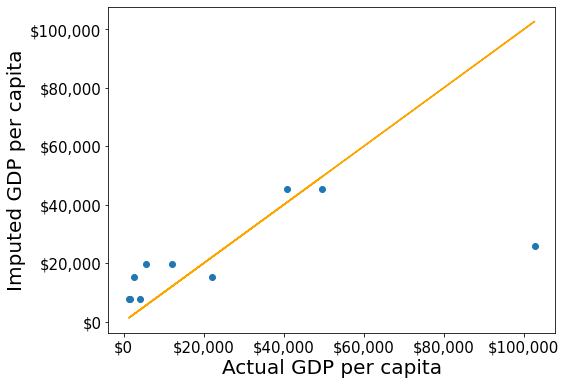

In [69]:
gdp_imputed_data = gdp_missing_data.copy()
gdp_imputed_data.gdpPerCapita=gdp_imputed_data.groupby('continent')['gdpPerCapita'].apply(lambda x:x.fillna(x.mean()))
plot_actual_vs_predicted()

In [49]:
#Creating a new categorical column 'energy_lvl'
spotify_data['energy_lvl'] = pd.qcut(spotify_data.energy,2,labels=['Low energy', 'High energy'])
#Grouping the data with 'genres' and 'energy_lvl'
grouped=spotify_data.groupby(['genres','energy_lvl'])

In [54]:
spotify_data.groupby(['genres','energy_lvl'])[['track_popularity','danceability']].agg({'track_popularity': [('avg','mean'),'std'],'danceability':[('ninety_pc',lambda x: x.quantile(0.9))]})

track_popularity            danceability
                                       avg        std    ninety_pc
genres        energy_lvl                                          
country       Low energy         34.982069  19.877274       0.7536
              High energy        49.859100  18.196092       0.7290
electronic    Low energy         43.754789  13.294925       0.8610
              High energy        43.005671  17.290356       0.8194
folk          Low energy         29.617831  15.360910       0.7060
              High energy        29.991957  14.556622       0.7385
hip hop       Low energy         50.283669  12.423124       0.8860
              High energy        48.012067  12.936656       0.8640
hoerspiel     Low energy         31.534779   5.953968       0.7520
              High energy        30.514032   7.609088       0.7270
jazz          Low energy         19.421085  14.599499       0.6909
              High energy        25.715373  16.662754       0.7690
latin         Low energy         34.308370  15.126721       0.7570
              High energy        39.992605  13.504109       0.8100
metal         Low energy         38.612403  16.000151       0.5890
              High energy        46.985621  13.993685       0.5570
miscellaneous Low energy         34.157235  16.516910       0.7810
              High energy        39.394186  15.241620       0.8050
pop           Low energy         34.722631  18.340408       0.7530
              High energy        40.597155  16.784034       0.7950
pop & rock    Low energy         32.987221  15.594202       0.7240
              High energy        37.413357  15.280915       0.7230
rap           Low energy         57.177966  16.491203       0.8732
              High energy        48.225166  22.182320       0.8810
rock          Low energy         34.654871  14.387263       0.7400
              High energy        38.256199  14.133726       0.7020

In [52]:
spotify_data.groupby(['genres','energy_lvl'])[['track_popularity','danceability']].agg([('avg','mean'),'std',('ninety_pc',lambda x: x.quantile(0.9))])

track_popularity                      danceability  \
                                       avg        std ninety_pc          avg   
genres        energy_lvl                                                       
country       Low energy         34.982069  19.877274      64.0     0.602382   
              High energy        49.859100  18.196092      69.0     0.597569   
electronic    Low energy         43.754789  13.294925      59.0     0.563125   
              High energy        43.005671  17.290356      61.2     0.634216   
folk          Low energy         29.617831  15.360910      51.0     0.510957   
              High energy        29.991957  14.556622      49.0     0.564669   
hip hop       Low energy         50.283669  12.423124      66.0     0.731064   
              High energy        48.012067  12.936656      63.0     0.714225   
hoerspiel     Low energy         31.534779   5.953968      37.0     0.673494   
              High energy        30.514032   7.609088      38.0     0.628369   
jazz          Low energy         19.421085  14.599499      41.0     0.503981   
              High energy        25.715373  16.662754      50.0     0.599330   
latin         Low energy         34.308370  15.126721      53.0     0.559290   
              High energy        39.992605  13.504109      58.0     0.644309   
metal         Low energy         38.612403  16.000151      60.4     0.409464   
              High energy        46.985621  13.993685      64.0     0.420022   
miscellaneous Low energy         34.157235  16.516910      56.0     0.543357   
              High energy        39.394186  15.241620      59.0     0.629966   
pop           Low energy         34.722631  18.340408      59.0     0.544546   
              High energy        40.597155  16.784034      61.0     0.628555   
pop & rock    Low energy         32.987221  15.594202      54.0     0.533666   
              High energy        37.413357  15.280915      57.0     0.554165   
rap           Low energy         57.177966  16.491203      75.0     0.712144   
              High energy        48.225166  22.182320      74.0     0.729174   
rock          Low energy         34.654871  14.387263      54.0     0.533698   
              High energy        38.256199  14.133726      57.0     0.510587   

                                               
                                std ninety_pc  
genres        energy_lvl                       
country       Low energy   0.128027    0.7536  
              High energy  0.105243    0.7290  
electronic    Low energy   0.242978    0.8610  
              High energy  0.152565    0.8194  
folk          Low energy   0.152062    0.7060  
              High energy  0.136981    0.7385  
hip hop       Low energy   0.134749    0.8860  
              High energy  0.125525    0.8640  
hoerspiel     Low energy   0.072998    0.7520  
              High energy  0.083672    0.7270  
jazz          Low energy   0.147328    0.6909  
              High energy  0.135762    0.7690  
latin         Low energy   0.158853    0.7570  
              High energy  0.137094    0.8100  
metal         Low energy   0.146364    0.5890  
              High energy  0.123839    0.5570  
miscellaneous Low energy   0.188526    0.7810  
              High energy  0.146947    0.8050  
pop           Low energy   0.158974    0.7530  
              High energy  0.136695    0.7950  
pop & rock    Low energy   0.150233    0.7240  
              High energy  0.138734    0.7230  
rap           Low energy   0.139155    0.8732  
              High energy  0.130477    0.8810  
rock          Low energy   0.160000    0.7400  
              High energy  0.149943    0.7020

In [35]:
data_pivot=gdp_lifeExp_data.pivot(index=['continent','country'], columns='year')
data_pivot.groupby(axis=1,level=0).mean()

gdpPercap    lifeExp           pop
continent country                                              
Africa    Algeria          4426.025973  59.030167  1.987541e+07
          Angola           3607.100529  37.883500  7.309390e+06
          Benin            1155.395107  48.779917  4.017497e+06
          Botswana         5031.503557  54.597500  9.711862e+05
          Burkina Faso      843.990665  44.694000  7.548677e+06
...                                ...        ...           ...
Europe    Switzerland     27074.334405  75.565083  6.384293e+06
          Turkey           4469.453380  59.696417  4.590901e+07
          United Kingdom  19380.472986  73.922583  5.608780e+07
Oceania   Australia       19980.595634  74.662917  1.464931e+07
          New Zealand     17262.622813  73.989500  3.100032e+06

[142 rows x 3 columns]

The GroupBy object `grouped` contains the information of the groups in which the data is distributed. Each observation has been assigned to a specific group of the column(s) used to group the data. However, note that the dataset is not physically split into different DataFrames.  For example, in the above case, each observation is assigned to a particular group depending on the value of the `continent` for that observation. However, all the observations are still in the same DataFrame `data`.

### Attributes and methods of the *GroupBy* object

#### `keys`

The object(s) grouping the data are called *key(s)*. Here `continent` is the group key. The keys of the *GroupBy* object can be seen using Its `keys` attribute.

In [8]:
#Key(s) of the GroupBy object
grouped.keys

'continent'

#### [`ngroups`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.ngroup.html)
The number of groups in which the data is distributed based on the keys can be seen with the `ngroups` attribute.

In [9]:
#The number of groups based on the key(s)
grouped.ngroups

5

#### [`groups`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.groups.html)
The `groups` attribute of the *GroupBy* object contains the group labels (or names) and the row labels of the observations in each group, as a dictionary.

In [10]:
#The groups (in the dictionary format)
grouped.groups

{'Africa': [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, ...], 'Americas': [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 432, 433, 434, 435, ...],

The group names are the *keys* of the dictionary, while the row labels are the corresponding *values*

In [11]:
#Group names
grouped.groups.keys()

dict_keys(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'])

In [12]:
#Group values are the row labels corresponding to a particular group
grouped.groups.values()

dict_values([Int64Index([  24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
            ...
            1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703],
           dtype='int64', length=624), Int64Index([  48,   49,   50,   51,   52,   53,   54,   55,   56,   57,
            ...
            1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643],
           dtype='int64', length=300), Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679],
           dtype='int64', length=396), Int64Index([  12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
            ...
            1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607],
           dtype='int64', length=360), Int64Index([  60,   61,   62,   63,   64,   65,   66,   67,   68,   69,   70,
              71, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101,
            1102, 1103],
      

#### [`size()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.size.html)
The `size()` method of the *GroupBy* object returns the number of observations in each group.

In [13]:
#Number of observations in each group
grouped.size()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
dtype: int64

#### [`first()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.first.html)
The first non missing element of each group is returned with the `first()` method of the *GroupBy* object.

In [15]:
#The first element of the group can be printed using the first() method
grouped.first()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,Algeria,1952,43.077,9279525,2449.008185
Americas,Argentina,1952,62.485,17876956,5911.315053
Asia,Afghanistan,1952,28.801,8425333,779.445314
Europe,Albania,1952,55.230,1282697,1601.056136
Oceania,Australia,1952,69.120,8691212,10039.595640


#### [`get_group()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html)
This method returns the observations for a particular group of the *GroupBy* object.

In [16]:
#Observations for individual groups can be obtained using the get_group() function
grouped.get_group('Asia')

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538
1676,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827


## Data aggregation with `groupby()` methods

### [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.mean.html)

This method returns the mean of each group of the *GroupBy* object.

#### Grouping observations

**Example:** Find the mean life expectancy, population and GDP per capita for each country since 1952.

First, we'll group the data such that all observations corresponding to a country make a unique group.

In [22]:
#Grouping the observations by 'country'
grouped = gdp_lifeExp_data.groupby('country')

Now, we'll find the mean statistics for each group with the `mean()` method. The method will be applied on all columns of the DataFrame and all groups.

In [25]:
#Finding the mean stastistic of all columns of the DataFrame and all groups
grouped.mean()

,year,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,1979.5,37.478833,1.582372e+07,802.674598
Albania,1979.5,68.432917,2.580249e+06,3255.366633
Algeria,1979.5,59.030167,1.987541e+07,4426.025973
Angola,1979.5,37.883500,7.309390e+06,3607.100529
Argentina,1979.5,69.060417,2.860224e+07,8955.553783
...,...,...,...,...
Vietnam,1979.5,57.479500,5.456857e+07,1017.712615
West Bank and Gaza,1979.5,60.328667,1.848606e+06,3759.996781
"Yemen, Rep.",1979.5,46.780417,1.084319e+07,1569.274672


Note that if we wished to retain the `continent` in the above dataset, we can group the data by both `continent` and `country`. If the data is to be grouped by multiple columns, we need to put them within `[]` brackets:

In [27]:
#Grouping the observations by 'continent' and 'country'
grouped = gdp_lifeExp_data.groupby(['continent','country'])

#Finding the mean stastistic of all columns of the DataFrame and all groups
grouped.mean()

year    lifeExp           pop     gdpPercap
continent country                                                      
Africa    Algeria         1979.5  59.030167  1.987541e+07   4426.025973
          Angola          1979.5  37.883500  7.309390e+06   3607.100529
          Benin           1979.5  48.779917  4.017497e+06   1155.395107
          Botswana        1979.5  54.597500  9.711862e+05   5031.503557
          Burkina Faso    1979.5  44.694000  7.548677e+06    843.990665
...                          ...        ...           ...           ...
Europe    Switzerland     1979.5  75.565083  6.384293e+06  27074.334405
          Turkey          1979.5  59.696417  4.590901e+07   4469.453380
          United Kingdom  1979.5  73.922583  5.608780e+07  19380.472986
Oceania   Australia       1979.5  74.662917  1.464931e+07  19980.595634
          New Zealand     1979.5  73.989500  3.100032e+06  17262.622813

[142 rows x 4 columns]

Here the data has been aggregated according to the group keys - `continent` and `country`, and a new DataFrame is created that is indexed by the unique values of `continent`-`country`.

For large datasets, it may be desirable to aggregate only a few columns. For example, if we wish to compute the means of only `lifeExp` and `gdpPercap`, then we can filter those columns in the *GroupBy* object *(just like we filter columns in a DataFrame)*, and then apply the `mean()` method:

In [28]:
grouped[['lifeExp','gdpPercap']].mean()

lifeExp     gdpPercap
continent country                                
Africa    Algeria         59.030167   4426.025973
          Angola          37.883500   3607.100529
          Benin           48.779917   1155.395107
          Botswana        54.597500   5031.503557
          Burkina Faso    44.694000    843.990665
...                             ...           ...
Europe    Switzerland     75.565083  27074.334405
          Turkey          59.696417   4469.453380
          United Kingdom  73.922583  19380.472986
Oceania   Australia       74.662917  19980.595634
          New Zealand     73.989500  17262.622813

[142 rows x 2 columns]

#### Grouping columns

By default, the grouping takes place by rows. However, as with several other Pandas methods, grouping can also be done by columns by using the `axis = 1` argument.

**Example:** Consider we have the above dataset in the wide-format as follows.

In [4]:
gdp_lifeExp_data_wide = gdp_lifeExp_data.pivot(index = ['continent','country'],columns = 'year')
gdp_lifeExp_data_wide

lifeExp                                          \
year                        1952    1957    1962    1967    1972    1977   
continent country                                                          
Africa    Algeria         43.077  45.685  48.303  51.407  54.518  58.014   
          Angola          30.015  31.999  34.000  35.985  37.928  39.483   
          Benin           38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana        47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso    31.975  34.906  37.814  40.697  43.591  46.137   
...                          ...     ...     ...     ...     ...     ...   
Europe    Switzerland     69.620  70.560  71.320  72.770  73.780  75.390   
          Turkey          43.585  48.079  52.098  54.336  57.005  59.507   
          United Kingdom  69.180  70.420  70.760  71.360  72.010  72.760   
Oceania   Australia       69.120  70.330  70.930  71.100  71.930  73.490   
          New Zealand     69.390  70.260  71.240  71.520  71.890  72.220   

                                                          ...     gdpPercap  \
year                        1982    1987    1992    1997  ...          1962   
continent country                                         ...                 
Africa    Algeria         61.368  65.799  67.744  69.152  ...   2550.816880   
          Angola          39.942  39.906  40.647  40.963  ...   4269.276742   
          Benin           50.904  52.337  53.919  54.777  ...    949.499064   
          Botswana        61.484  63.622  62.745  52.556  ...    983.653976   
          Burkina Faso    48.122  49.557  50.260  50.324  ...    722.512021   
...                          ...     ...     ...     ...  ...           ...   
Europe    Switzerland     76.210  77.410  78.030  79.370  ...  20431.092700   
          Turkey          61.036  63.108  66.146  68.835  ...   2322.869908   
          United Kingdom  74.040  75.007  76.420  77.218  ...  12477.177070   
Oceania   Australia       74.740  76.320  77.560  78.830  ...  12217.226860   
          New Zealand     73.840  74.320  76.330  77.550  ...  13175.678000   

                                                                    \
year                              1967          1972          1977   
continent country                                                    
Africa    Algeria          3246.991771   4182.663766   4910.416756   
          Angola           5522.776375   5473.288005   3008.647355   
          Benin            1035.831411   1085.796879   1029.161251   
          Botswana         1214.709294   2263.611114   3214.857818   
          Burkina Faso      794.826560    854.735976    743.387037   
...                                ...           ...           ...   
Europe    Switzerland     22966.144320  27195.113040  26982.290520   
          Turkey           2826.356387   3450.696380   4269.122326   
          United Kingdom  14142.850890  15895.116410  17428.748460   
Oceania   Australia       14526.124650  16788.629480  18334.197510   
          New Zealand     14463.918930  16046.037280  16233.717700   

                                                                    \
year                              1982          1987          1992   
continent country                                                    
Africa    Algeria          5745.160213   5681.358539   5023.216647   
          Angola           2756.953672   2430.208311   2627.845685   
          Benin            1277.897616   1225.856010   1191.207681   
          Botswana         4551.142150   6205.883850   7954.111645   
          Burkina Faso      807.198586    912.063142    931.752773   
...                                ...           ...           ...   
Europe    Switzerland     28397.715120  30281.704590  31871.530300   
          Turkey           4241.356344   5089.043686   5678.348271   
          United Kingdom  18232.424520  21664.787670  22705.092540   
Oceania   Australia       19477.

Now, find the mean GDP per capita, life expectancy and population for each country.

Here, we can group by the outer level column labels to obtain the means. Also, we need to use the argument `axis=1` to indicate that we intend to group columns, instead of rows.

In [5]:
gdp_lifeExp_data_wide.groupby(axis=1,level=0).mean()

gdpPercap    lifeExp           pop
continent country                                              
Africa    Algeria          4426.025973  59.030167  1.987541e+07
          Angola           3607.100529  37.883500  7.309390e+06
          Benin            1155.395107  48.779917  4.017497e+06
          Botswana         5031.503557  54.597500  9.711862e+05
          Burkina Faso      843.990665  44.694000  7.548677e+06
...                                ...        ...           ...
Europe    Switzerland     27074.334405  75.565083  6.384293e+06
          Turkey           4469.453380  59.696417  4.590901e+07
          United Kingdom  19380.472986  73.922583  5.608780e+07
Oceania   Australia       19980.595634  74.662917  1.464931e+07
          New Zealand     17262.622813  73.989500  3.100032e+06

[142 rows x 3 columns]

### Practice exercise 1

Read the table consisting of GDP per capita of countries from the webpage: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita . 

To only read the relevant table, read the tables that contain the word *'Country'*. 

Estimate the GDP per capita of each country as the average of the estimates of the three agencies - IMF, United Nations and World Bank.

We need to do a bit of data cleaning before we could directly use the `groupby()` function. Follow the steps below to answer this question:

1. Set the first 3 columns containing country, sub-region and region as hierarchical row labels. 

2. Apply the following function on all the columns to convert them to numeric: `f = lambda x:pd.to_numeric(x,errors = 'coerce')`

3. Now use `groupby()` to find estimate the GDP per capita for each country.

In [ ]:
#| echo: false
#| eval: false

dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita', match = 'Country')
gdp_per_capita = dfs[0]
gdp_per_capita_reindexed = gdp_per_capita.set_index([('Country/Territory','Country/Territory'),
                                                     ('UN Region','UN Region')])
gdp_per_capita_numeric=gdp_per_capita_reindexed.apply(lambda x:pd.to_numeric(x,errors = 'coerce'))
gdp_per_capita_numeric.groupby(axis=1,level=1).mean().drop(columns='Year')

### [`agg()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)

Directly applying the aggregate methods of the *GroupBy* object such as mean, count, etc., lets us apply only one function at a time. Also, we may wish to apply an aggregate function of our own, which is not there in the set of methods of the *GroupBy* object, such as the range of values of a column.

The `agg()` function of a *GroupBy* object lets us aggregate data using: 

1. Multiple aggregation functions

2. Custom aggregate functions (in addition to in-built functions like mean, std, count etc.) 

Consider the spotify dataset containing information about tracks and artists.

In [137]:
spotify_data = pd.read_csv('./Datasets/spotify_data.csv')
spotify_data.head(3)

,artist_followers,genres,artist_name,artist_popularity,track_name,track_popularity,duration_ms,explicit,release_year,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,16996777,rap,Juice WRLD,96,All Girls Are The Same,0,165820,1,2021,0.673,...,0,-7.226,1,0.306,0.0769,0.000338,0.0856,0.203,161.991,4
1,16996777,rap,Juice WRLD,96,Lucid Dreams,0,239836,1,2021,0.511,...,6,-7.230,0,0.200,0.3490,0.000000,0.3400,0.218,83.903,4
2,16996777,rap,Juice WRLD,96,Hear Me Calling,0,189977,1,2021,0.699,...,7,-3.997,0,0.106,0.3080,0.000036,0.1210,0.499,88.933,4


Suppose, we wish to find the average popularity of tracks for each genre. We can do that by using the `mean()` method of a *GroupBy* object, as shown in the previous section. We will also sort the table by decreasing average popularity.

In [138]:
grouped=spotify_data.groupby('genres')
grouped['track_popularity'].mean().sort_values(ascending = False)

genres
rap              51.162959
hip hop          48.700665
metal            46.334539
electronic       43.253165
country          41.132686
pop              37.783194
latin            37.563765
rock             36.749623
miscellaneous    36.167401
pop & rock       35.619242
hoerspiel        31.258670
folk             29.716767
jazz             20.349472
Name: track_popularity, dtype: float64

Let us also find the standard deviation of the popularity of the tracks for each genre. We will also sort the table by decreasing standard deviation of popularity.

In [10]:
grouped['track_popularity'].std().sort_values(ascending = False)

genres
rap              20.912240
country          20.544338
pop              17.790385
miscellaneous    16.240129
electronic       16.075841
pop & rock       15.560975
folk             15.150717
jazz             15.087119
latin            14.492199
rock             14.350580
metal            14.331154
hip hop          12.824901
hoerspiel         6.459370
Name: track_popularity, dtype: float64

Even though rap is the most popular genre on an average, its popularity varies the most amongs listners. So, it should probably be recommended only to rap listners or the criteria to accept rap songs on Spotify should be more stringent.

#### Multiple aggregate functions

Let us use the `agg()` method of the *GroupBy* object to simultaneously find the mean and standard deviation of the track popularity for each genre.

For aggregating by multiple functions, we pass a list of strings to *agg()*, where the strings are the function names. 

In [11]:
grouped['track_popularity'].agg(['mean','std']).sort_values(by = 'mean',ascending = False)

,mean,std
genres,,
rap,51.162959,20.912240
hip hop,48.700665,12.824901
metal,46.334539,14.331154
electronic,43.253165,16.075841
country,41.132686,20.544338
pop,37.783194,17.790385
latin,37.563765,14.492199
rock,36.749623,14.350580
miscellaneous,36.167401,16.240129


From the above table, we observe that people not just like hip-hop the second most on average, but they also like it more consistently than almost all other genres. We have also sorted the above table by decreasing average track popularity.

#### Custom aggregate functions

In addition to the mean and standard deviation of the track popularirty of each genre, let us also include the $90^{th}$ percentile of track popularity in the table above, and sort it by the same.

In [19]:
#Defining a function that returns the 90th percentile value
def Ninety_pc(x):
    return x.quantile(0.9)

In [20]:
grouped['track_popularity'].agg(['mean','std',Ninety_pc]).sort_values(by = 'Ninety_pc',ascending = False)

,mean,std,Ninety_pc
genres,,,
rap,51.162959,20.912240,74
country,41.132686,20.544338,67
hip hop,48.700665,12.824901,64
metal,46.334539,14.331154,63
electronic,43.253165,16.075841,61
pop,37.783194,17.790385,60
miscellaneous,36.167401,16.240129,57
latin,37.563765,14.492199,56
pop & rock,35.619242,15.560975,56


From the above table, we observe that even though country songs are not as popular as hip-hop on an average, the top $10\%$ country tracks are more popular than the top $10\%$ hip hop tracks.

For aggregating by multiple functions & changing the column names resulting from those functions, we pass a list of tuples to `agg()`, where each tuple is of length two, and contains the new column name & the function to be applied.

In [21]:
#Simultaneous renaming of columns while grouping
grouped['track_popularity'].agg([('Average','mean'),('Standard deviation','std'),('90th percentile',Ninety_pc)]).sort_values(by = '90th percentile',ascending = False)

,Average,Standard deviation,90th percentile
genres,,,
rap,51.162959,20.912240,74
country,41.132686,20.544338,67
hip hop,48.700665,12.824901,64
metal,46.334539,14.331154,63
electronic,43.253165,16.075841,61
pop,37.783194,17.790385,60
miscellaneous,36.167401,16.240129,57
latin,37.563765,14.492199,56
pop & rock,35.619242,15.560975,56


We can put use a lambda function as well instead of separately defining the function `Ninety_pc` in the above code:

In [22]:
#Simultaneous renaming of columns while grouping
grouped['track_popularity'].agg([('Average','mean'),('Standard deviation','std'),('90th percentile',lambda x:x.quantile(0.9))]).sort_values(by = '90th percentile',ascending = False)

,Average,Standard deviation,90th percentile
genres,,,
rap,51.162959,20.912240,74
country,41.132686,20.544338,67
hip hop,48.700665,12.824901,64
metal,46.334539,14.331154,63
electronic,43.253165,16.075841,61
pop,37.783194,17.790385,60
miscellaneous,36.167401,16.240129,57
latin,37.563765,14.492199,56
pop & rock,35.619242,15.560975,56


#### Grouping by multiple columns

Let us find aggregate statistics when we group data by multiple columns. For that, let us create a new categorical column `energy_lvl` that has two levels - *Low energy* and *High energy*, depending on the `energy` of the track.

In [141]:
#Creating a new categorical column 'energy_lvl'
spotify_data['energy_lvl'] = pd.qcut(spotify_data.energy,2,labels=['Low energy', 'High energy'])

Now, let us find the mean, standard deviation and 90th percentile value of the track popularity for each genre-energy level combination simultaneously.

In [40]:
#Grouping the data with 'genres' and 'energy_lvl'
grouped=spotify_data.groupby(['genres','energy_lvl'])

In [41]:
#Finding aggregate statistics of data grouped with multple columns
grouped['track_popularity'].agg(['mean','std',Ninety_pc])

mean        std  Ninety_pc
genres        energy_lvl                                  
country       Low energy   34.982069  19.877274       64.0
              High energy  49.859100  18.196092       69.0
electronic    Low energy   43.754789  13.294925       59.0
              High energy  43.005671  17.290356       61.2
folk          Low energy   29.617831  15.360910       51.0
              High energy  29.991957  14.556622       49.0
hip hop       Low energy   50.283669  12.423124       66.0
              High energy  48.012067  12.936656       63.0
hoerspiel     Low energy   31.534779   5.953968       37.0
              High energy  30.514032   7.609088       38.0
jazz          Low energy   19.421085  14.599499       41.0
              High energy  25.715373  16.662754       50.0
latin         Low energy   34.308370  15.126721       53.0
              High energy  39.992605  13.504109       58.0
metal         Low energy   38.612403  16.000151       60.4
              High energy  46.985621  13.993685       64.0
miscellaneous Low energy   34.157235  16.516910       56.0
              High energy  39.394186  15.241620       59.0
pop           Low energy   34.722631  18.340408       59.0
              High energy  40.597155  16.784034       61.0
pop & rock    Low energy   32.987221  15.594202       54.0
              High energy  37.413357  15.280915       57.0
rap           Low energy   57.177966  16.491203       75.0
              High energy  48.225166  22.182320       74.0
rock          Low energy   34.654871  14.387263       54.0
              High energy  38.256199  14.133726       57.0

For most of the genres, there is not much difference between the average popularity of low energy and high energy tracks. However, in case of country tracks people seem to to prefer high energy tracks a lot more as compared to low energy tracks.

#### Multiple aggregate functions on multiple columns

Let us find the mean and standard deviation of track popularity and danceability for each genre and energy level.

In [139]:
spotify_popularity_danceability = grouped[['track_popularity','danceability']].agg([('Average','mean'),('Standard deviation','std')])
spotify_popularity_danceability

track_popularity                    danceability  \
                       Average Standard deviation      Average   
genres                                                           
country              41.132686          20.544338     0.600392   
electronic           43.253165          16.075841     0.610729   
folk                 29.716767          15.150717     0.525161   
hip hop              48.700665          12.824901     0.719329   
hoerspiel            31.258670           6.459370     0.661288   
jazz                 20.349472          15.087119     0.518045   
latin                37.563765          14.492199     0.607981   
metal                46.334539          14.331154     0.419201   
miscellaneous        36.167401          16.240129     0.576601   
pop                  37.783194          17.790385     0.588314   
pop & rock           35.619242          15.560975     0.545856   
rap                  51.162959          20.912240     0.723586   
rock                 36.749623          14.350580     0.520255   

                                  
              Standard deviation  
genres                            
country                 0.119116  
electronic              0.190133  
folk                    0.150081  
hip hop                 0.128615  
hoerspiel               0.078628  
jazz                    0.149548  
latin                   0.152661  
metal                   0.125717  
miscellaneous           0.178777  
pop                     0.153629  
pop & rock              0.143857  
rap                     0.133588  
rock                    0.154649

We get a couple of insights from the above table:

- High energy songs have higher danceability for most genres as expected. However, for hip-hop, country, rock and hoerspiel, even low-energy songs have comparable danceability.

- Hip hop has the highest danceability as expected. However, high energy rap also has relatively high danceability.

#### Distinct aggregate functions on multiple columns

For aggregating by multiple functions, we pass a list of strings to `agg()`, where the strings are the function names. 

For aggregating by multiple functions & changing the column names resulting from those functions, we pass a list of tuples to `agg()`, where each tuple is of length two, and contains the new column name as the first object and the function to be applied as the second object of the tuple.

For aggregating by multiple functions such that a distinct set of functions is applied to each column, we pass a dictionary to `agg()`, where the keys are the column names on which the function is to be applied, and the values are the list of strings that are the function names, or a list of tuples if we also wish to name the aggregated columns.

**Example:** For each genre and energy level, find the mean and standard deviation of the track popularity, and the minimum and maximum values of loudness.

In [78]:
#Specifying arguments to the function as a dictionary if distinct functions are to be applied on distinct columns
grouped.agg({'track_popularity':[('Average','mean'),('Standard deviation','std')],'loudness':['min','max']})

track_popularity                    loudness       
                                   Average Standard deviation      min    max
genres        energy_lvl                                                     
country       Low energy         34.982069          19.877274  -23.163 -4.145
              High energy        49.859100          18.196092  -16.763 -0.716
electronic    Low energy         43.754789          13.294925  -60.000 -4.936
              High energy        43.005671          17.290356  -19.756 -0.533
folk          Low energy         29.617831          15.360910  -28.715 -0.972
              High energy        29.991957          14.556622  -16.383  0.501
hip hop       Low energy         50.283669          12.423124  -25.947 -1.595
              High energy        48.012067          12.936656  -18.273  0.642
hoerspiel     Low energy         31.534779           5.953968  -29.907 -4.910
              High energy        30.514032           7.609088  -22.046 -2.130
jazz          Low energy         19.421085          14.599499  -60.000 -2.962
              High energy        25.715373          16.662754  -27.563 -1.166
latin         Low energy         34.308370          15.126721  -31.897 -2.331
              High energy        39.992605          13.504109  -18.357 -1.204
metal         Low energy         38.612403          16.000151  -32.032 -4.311
              High energy        46.985621          13.993685  -16.244 -1.275
miscellaneous Low energy         34.157235          16.516910  -44.410 -1.409
              High energy        39.394186          15.241620  -37.684  1.634
pop           Low energy         34.722631          18.340408  -41.182 -0.045
              High energy        40.597155          16.784034  -27.575  0.330
pop & rock    Low energy         32.987221          15.594202  -60.000 -1.823
              High energy        37.413357          15.280915  -22.234  1.107
rap           Low energy         57.177966          16.491203  -23.611 -1.218
              High energy        48.225166          22.182320  -15.012  0.457
rock          Low energy         34.654871          14.387263  -42.488 -1.708
              High energy        38.256199          14.133726  -25.291  3.744

From the above table, we observe that high energy songs are always louder than low energy songs. High energy Rock songs can be very loud.

## [`apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.apply.html): Data aggregation, filtering & transformation 

With the `apply()` method of the *GroupBy* object, we can perform several operations on groups, other than data aggregation.

### Filtering data by group

**Example**: Find the top 3 most popular tracks of each genre in the spotify dataset.

We'll first define a function that sorts a dataset by decreasing track popularity and returns the top 3 rows. Then, we'll apply this function on each group using the `apply()` method of the *GroupBy* object.

In [104]:
#Defining the function that finds the top 3 most popular tracks from the dataset 'x'
def top_stats(x,col='track_popularity',n=3):
    return x.sort_values(by=col,ascending = False)[0:n]

In [105]:
#Defining the groups in the spotify data
grouped_spotify_data = spotify_data.groupby('genres')

Now we'll use the `apply()` method to apply the `top_stats()` function on each group of the object `grouped_spotify_data`.

In [106]:
#Top 3 tracks of each genre
top3_tracks = grouped_spotify_data.apply(top_stats)
top3_tracks.head()

artist_followers      genres    artist_name  \
genres                                                          
country    4047            4755356     country     Luke Combs   
           2403            1678738     country  Morgan Wallen   
           16244           1678738     country  Morgan Wallen   
electronic 83058           7650304  electronic      Daft Punk   
           13068          28026432  electronic    Alan Walker   

                  artist_popularity         track_name  track_popularity  \
genres                                                                     
country    4047                  85  Forever After All                82   
           2403                  88      Wasted On You                81   
           16244                 88    Whiskey Glasses                81   
electronic 83058                 86      One More Time                81   
           13068                 85              Faded                80   

                  duration_ms  explicit  release_year  danceability  ...  \
genres                                                               ...   
country    4047        232533         0          2020         0.487  ...   
           2403        178520         0          2021         0.505  ...   
           16244       234347         0          2018         0.614  ...   
electronic 83058       320357         0          2001         0.611  ...   
           13068       212107         0          2018         0.468  ...   

                  loudness  mode  speechiness  acousticness  instrumentalness  \
genres                                                                          
country    4047     -5.195     1       0.0253        0.1910          0.000000   
           2403     -5.240     0       0.0318        0.3730          0.001070   
           16244    -4.580     1       0.0289        0.3690          0.000002   
electronic 83058    -8.618     1       0.1330        0.0193          0.000000   
           13068    -5.085     1       0.0476        0.0281          0.000008   

                  liveness  valence    tempo  time_signature   energy_lvl  
genres                                                                     
country    4047     0.0933    0.456  151.964               4  High energy  
           2403     0.1260    0.252  196.000               3  High energy  
           16244    0.1150    0.707  149.959               4  High energy  
electronic 83058    0.3320    0.476  122.752               4  High energy  
           13068    0.1100    0.159  179.642               4  High energy  

[5 rows x 22 columns]

The `top_stats()` function is applied to each group, and the results are concatenated internally with the `concat()` function. The output therefore has a hierarchical index whose outer level indices are the group keys.

We can also use a lambda function instead of separately defining the function `top_tracks()`:

In [107]:
#Top 3 tracks of each genre - using lambda function
top3_tracks = grouped_spotify_data.apply(lambda x:x.sort_values(by = 'track_popularity',ascending=False)[0:3])
top3_tracks.head()

artist_followers      genres    artist_name  \
genres                                                          
country    4047            4755356     country     Luke Combs   
           2403            1678738     country  Morgan Wallen   
           16244           1678738     country  Morgan Wallen   
electronic 83058           7650304  electronic      Daft Punk   
           13068          28026432  electronic    Alan Walker   

                  artist_popularity         track_name  track_popularity  \
genres                                                                     
country    4047                  85  Forever After All                82   
           2403                  88      Wasted On You                81   
           16244                 88    Whiskey Glasses                81   
electronic 83058                 86      One More Time                81   
           13068                 85              Faded                80   

                  duration_ms  explicit  release_year  danceability  ...  \
genres                                                               ...   
country    4047        232533         0          2020         0.487  ...   
           2403        178520         0          2021         0.505  ...   
           16244       234347         0          2018         0.614  ...   
electronic 83058       320357         0          2001         0.611  ...   
           13068       212107         0          2018         0.468  ...   

                  loudness  mode  speechiness  acousticness  instrumentalness  \
genres                                                                          
country    4047     -5.195     1       0.0253        0.1910          0.000000   
           2403     -5.240     0       0.0318        0.3730          0.001070   
           16244    -4.580     1       0.0289        0.3690          0.000002   
electronic 83058    -8.618     1       0.1330        0.0193          0.000000   
           13068    -5.085     1       0.0476        0.0281          0.000008   

                  liveness  valence    tempo  time_signature   energy_lvl  
genres                                                                     
country    4047     0.0933    0.456  151.964               4  High energy  
           2403     0.1260    0.252  196.000               3  High energy  
           16244    0.1150    0.707  149.959               4  High energy  
electronic 83058    0.3320    0.476  122.752               4  High energy  
           13068    0.1100    0.159  179.642               4  High energy  

[5 rows x 22 columns]

We can also pass arguments to the `top_stats()` function with the `apply()` function.

**Example:** Find the most popular artist from each genre.

In [113]:
#Applying the 'top_stats()' function to each group of the data (based on 'genre') to find the most popular artist 
#Dropping the inner row label as it is not informative
grouped_spotify_data.apply(top_stats,col='artist_popularity',n=1)['artist_name'].droplevel(axis=0, level = 1)

genres
country               Morgan Wallen
electronic                Daft Punk
folk                       Bon Iver
hip hop                      Eminem
hoerspiel              Die drei ???
jazz             Earth, Wind & Fire
latin                        Maluma
metal                   Linkin Park
miscellaneous             Pop Smoke
pop                   Justin Bieber
pop & rock                 Maroon 5
rap                       Bad Bunny
rock                Imagine Dragons
Name: artist_name, dtype: object

### Practice exercise 2
Filter the first 4 columns of the spotify dataset. Drop duplicate observartions in the resulting dataset using the Pandas DataFrame method [`drop_duplicates()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html). Find the top 3 most popular artists for each genre.

In [ ]:
#| echo: false
#| eval: false
spotify_data.iloc[:,0:4].drop_duplicates().groupby('genres').apply(lambda x:x.sort_values(by = 'artist_popularity', 
                                                                                          ascending = False)[0:3])

### Transforming data by group

Recall [method 3](https://nustat.github.io/DataScience_Intro_python/Data%20cleaning%20and%20preparation.html#method-3-imputing-missing-values-based-on-correlated-variables-in-the-data) for imputing missing values in Chapter 7. The method was to impute missing values based on correlated variables in data.

In the example shown for the method, values of GDP per capita for a few countries were missing. We imputed the missing value of GDP per capita for those countries as the average GDP per capita of the corresponding continent.

We will compare the approach we used with the approach using the `groupby()` & `apply()` methods.

Let us read the datasets and the function that makes a visualization to compare the imputed values with the actual values.

In [114]:
#Importing data with missing values
gdp_missing_data = pd.read_csv('./Datasets/GDP_missing_data.csv')

#Importing data with all values
gdp_complete_data = pd.read_csv('./Datasets/GDP_complete_data.csv')

In [122]:
#Index of rows with missing values for GDP per capita
null_ind_gdpPC = gdp_missing_data.index[gdp_missing_data.gdpPerCapita.isnull()]

#Defining a function to plot the imputed values vs actual values 
def plot_actual_vs_predicted():
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    x = gdp_complete_data.loc[null_ind_gdpPC,'gdpPerCapita']
    y = gdp_imputed_data.loc[null_ind_gdpPC,'gdpPerCapita']
    plt.scatter(x,y)
    z=np.polyfit(x,y,1)
    p=np.poly1d(z)
    plt.plot(x,x,color='orange')
    plt.xlabel('Actual GDP per capita',fontsize=20)
    plt.ylabel('Imputed GDP per capita',fontsize=20)
    ax.xaxis.set_major_formatter('${x:,.0f}')
    ax.yaxis.set_major_formatter('${x:,.0f}')
    rmse = np.sqrt(((x-y).pow(2)).mean())
    print("RMSE=",rmse)

**Approach 1:** Using the approach we used in Section [7.1.5.3](https://nustat.github.io/DataScience_Intro_python/Data%20cleaning%20and%20preparation.html#method-3-imputing-missing-values-based-on-correlated-variables-in-the-data)

RMSE= 25473.20645170116


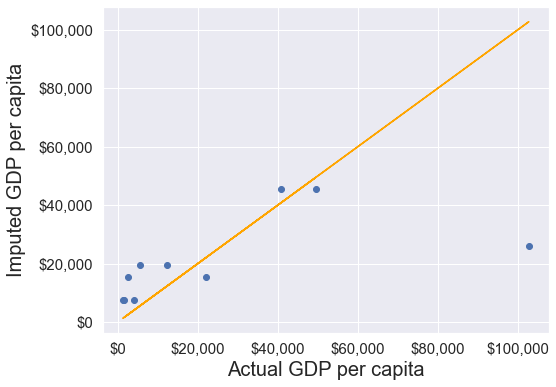

In [123]:
#Finding the mean GDP per capita of the continent
avg_gdpPerCapita = gdp_missing_data['gdpPerCapita'].groupby(gdp_missing_data['continent']).mean()

#Creating a copy of missing data to impute missing values
gdp_imputed_data = gdp_missing_data.copy()

#Replacing missing GDP per capita with the mean GDP per capita for the corresponding continent
for cont in avg_gdpPerCapita.index:
    gdp_imputed_data.loc[(gdp_imputed_data.continent==cont) & (gdp_imputed_data.gdpPerCapita.isnull()),
                     'gdpPerCapita']=avg_gdpPerCapita[cont]
plot_actual_vs_predicted()

**Approach 2:** Using the `groupby()` and `apply()` methods.

RMSE= 25473.20645170116


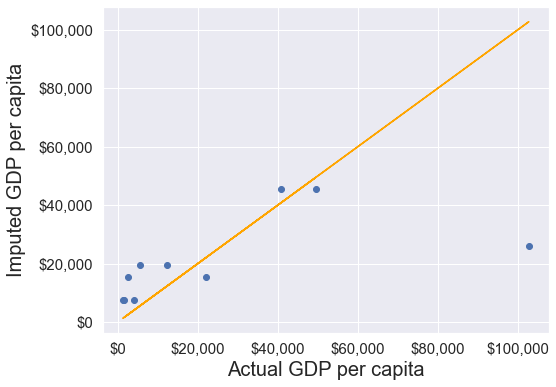

In [126]:
#Creating a copy of missing data to impute missing values
gdp_imputed_data = gdp_missing_data.copy()

#Grouping data by continent
grouped = gdp_missing_data.groupby('continent')

#Applying the lambda function on the 'gdpPerCapita' column of the groups
gdp_imputed_data['gdpPerCapita'] = grouped['gdpPerCapita'].apply(lambda x: x.fillna(x.mean()))

plot_actual_vs_predicted()

With the `apply()` function, the missing value of `gdpPerCapita` for observations of each group are filled by the mean `gdpPerCapita` of that group. The code is not only more convenient to write, but also faster as compared to `for` loops. The `for` loop imputes the missing values of observations of one group at a time, while the imputation may happen in parallel for all groups with the `apply()` function.

### Sampling data by group

The `groupby()` and `apply()` method can be used to for stratified random sampling from a large dataset.

The spotify dataset has more than 200k observations. It may be expensive to operate with so many observations. Suppose, we wish to take a random sample of 650 observations to analyze spotify data, such that all genres are equally represented.

Before taking the random sample, let us find the number of tracks in each genre.

In [128]:
spotify_data.genres.value_counts()

pop              70441
rock             49785
pop & rock       43437
miscellaneous    35848
jazz             13363
hoerspiel        12514
hip hop           7373
folk              2821
latin             2125
rap               1798
metal             1659
country           1236
electronic         790
Name: genres, dtype: int64

Let us take a random sample of 650 observations from the entire dataset.

In [129]:
sample_spotify_data = spotify_data.sample(650)

Now, let us see the number of track of each genre in our sample.

In [130]:
sample_spotify_data.genres.value_counts()

pop              185
rock             150
miscellaneous    102
pop & rock        98
jazz              37
hoerspiel         25
hip hop           22
rap                7
metal              7
latin              5
country            5
folk               5
electronic         2
Name: genres, dtype: int64

Some of the genres have a very low representation in the data. To rectify this, we can take a random sample of 50 observations from each of the 13 genres. In other words, we can take a random sample from each of the genre-based groups.

In [132]:
evenly_sampled_spotify_data = spotify_data.groupby('genres').apply(lambda x:x.sample(50))
evenly_sampled_spotify_data.genres.value_counts()

hoerspiel        50
hip hop          50
pop & rock       50
latin            50
country          50
rap              50
electronic       50
metal            50
folk             50
pop              50
miscellaneous    50
rock             50
jazz             50
Name: genres, dtype: int64

The above stratified random sample equally represents all the genres.

## [`corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.corr.html): Correlation by group

The [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method of the *GroupBy* object returns the correlation between all pairs of columns within each group.

**Example:** Find the correlation between danceability and track popularity for each genre-energy level combination.

In [142]:
spotify_data.groupby(['genres','energy_lvl']).apply(lambda x:x['danceability'].corr(x['track_popularity']))

genres         energy_lvl 
country        Low energy    -0.171830
               High energy   -0.154823
electronic     Low energy     0.378330
               High energy    0.072343
folk           Low energy     0.187482
               High energy    0.230419
hip hop        Low energy     0.113421
               High energy    0.027074
hoerspiel      Low energy    -0.053908
               High energy   -0.044211
jazz           Low energy     0.005733
               High energy    0.332356
latin          Low energy    -0.083971
               High energy    0.030276
metal          Low energy     0.127439
               High energy    0.256165
miscellaneous  Low energy     0.163185
               High energy    0.148818
pop            Low energy     0.208942
               High energy    0.156764
pop & rock     Low energy     0.063127
               High energy    0.060195
rap            Low energy    -0.008394
               High energy   -0.129873
rock           Low energy     0.02787

The popularity of low energy electronic music is the most correlated with its danceability. 

## [`pivot_table()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

The Pandas `pivot_table()` function is used to aggregate data groupwise where some of the group keys are along the rows and some along the columns. Note that `pivot_table()` is the same as `pivot()` except that `pivot_table()` aggregates the data as well in addition to re-arranging it.

**Example:** Find the mean of track popularity for each genre-energy lvl combination such that each row corresponds to a genre, and the energy levels correspond to columns.

In [144]:
pd.pivot_table(data = spotify_data,values = 'track_popularity',index = 'genres', columns ='energy_lvl',aggfunc = 'mean',margins = True)

energy_lvl,Low energy,High energy,All
genres,,,
country,34.982069,49.859100,41.132686
electronic,43.754789,43.005671,43.253165
folk,29.617831,29.991957,29.716767
hip hop,50.283669,48.012067,48.700665
hoerspiel,31.534779,30.514032,31.258670
jazz,19.421085,25.715373,20.349472
latin,34.308370,39.992605,37.563765
metal,38.612403,46.985621,46.334539
miscellaneous,34.157235,39.394186,36.167401


We can use also use custom *GroupBy* aggregate functions with `pivot_table()`.

**Example**: Find the $90^{th}$ percentile of track popularity for each genre-energy lvl combination such that each row corresponds to a genre, and the energy levels correspond to columns.

In [145]:
pd.pivot_table(data = spotify_data,values = 'track_popularity',index = 'genres', columns ='energy_lvl',aggfunc = lambda x:np.percentile(x,90))

energy_lvl,Low energy,High energy
genres,,
country,64.0,69.0
electronic,59.0,61.2
folk,51.0,49.0
hip hop,66.0,63.0
hoerspiel,37.0,38.0
jazz,41.0,50.0
latin,53.0,58.0
metal,60.4,64.0
miscellaneous,56.0,59.0


## [`crosstab()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

The `crosstab()` method is a special case of a pivot table for computing group frequncies (or size of each group). We may often use it to check if the data is representative of all groups that are of interest to us.

**Example:** Find the number of observations in each group, where each groups corresponds to a distinct genre-energy lvl combination

In [146]:
#Cross tabulation of 'genres' and 'energy_lvl'
pd.crosstab(spotify_data.genres,spotify_data.energy_lvl,margins = True).sort_values(by = 'All',ascending = False)

energy_lvl,Low energy,High energy,All
genres,,,
All,121708,121482,243190
pop,33742,36699,70441
rock,20827,28958,49785
pop & rock,17607,25830,43437
miscellaneous,22088,13760,35848
jazz,11392,1971,13363
hoerspiel,9129,3385,12514
hip hop,2235,5138,7373
folk,2075,746,2821


The above table can be generated with the `pivot_table()` function using *'count'* as the `aggfunc` argument, as shown below. However, the `crosstab()` function is more compact to code.

In [148]:
#Generating cross-tabulation of 'genres' and 'energy_lvl' with 'pivot_table()'
pd.pivot_table(data = spotify_data,values = 'track_popularity',index = 'genres', columns ='energy_lvl',aggfunc = 'count',margins=True)

energy_lvl,Low energy,High energy,All
genres,,,
country,725,511,1236
electronic,261,529,790
folk,2075,746,2821
hip hop,2235,5138,7373
hoerspiel,9129,3385,12514
jazz,11392,1971,13363
latin,908,1217,2125
metal,129,1530,1659
miscellaneous,22088,13760,35848


**Example:** Find the percentage of observations in each group of the above table.

In [150]:
pd.crosstab(spotify_data.genres,spotify_data.energy_lvl,margins = True).sort_values(by = 'All',ascending = False)/spotify_data.shape[0]*100

energy_lvl,Low energy,High energy,All
genres,,,
All,50.046466,49.953534,100.000000
pop,13.874748,15.090670,28.965418
rock,8.564086,11.907562,20.471648
pop & rock,7.240018,10.621325,17.861343
miscellaneous,9.082610,5.658127,14.740738
jazz,4.684403,0.810477,5.494881
hoerspiel,3.753855,1.391916,5.145771
hip hop,0.919034,2.112751,3.031786
folk,0.853242,0.306756,1.159998


### Practice exercise 3
What percentage of unique tracks are contributed by the top 5 artists of each genre?

**Hint:** Find the top 5 artists based on `artist_popularity` for each genre. Count the total number of unique tracks (`track_name`) contributed by these artists. Divide this number by the total number of unique tracks in the data. The `nunique()` function will be useful.

In [ ]:
#| eval: false
#| echo: false
top5artists = spotify_data.iloc[:,0:4].drop_duplicates().groupby('genres').apply(lambda x:x.sort_values(by = 'artist_popularity', 
                            ascending = False)[0:5]).droplevel(axis=0,level=1)['artist_name']
top5artists_tracks = spotify_data.loc[spotify_data.artist_name.isin(top5artists),:]
top5artists_tracks.track_name.nunique()/spotify_data.track_name.nunique()